In [1]:
import os
import pandas as pd
import SimpleITK as sitk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import ImageViewer as iv
import get_data as gd
import Preprocessing as p
import preprocessing_franziska as pf
from matplotlib.ticker import MaxNLocator, FixedLocator, FixedFormatter

### Get paths to datafiles.

In [13]:
#LARC_patientPaths, LARC_PatientNames, LARC_imagePaths, LARC_maskPaths = gd.get_paths('/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped', 'image', 'label.nii')
Oxy_patientPaths, Oxy_PatientNames, Oxy_imagePaths, Oxy_maskPaths = gd.get_paths('/Volumes/LaCie/DWandOtherContour', 'DW_b500', 'ssh.nii')

### Create dataframes

In [10]:
#LARC_df = p.dataframe(LARC_patientPaths, LARC_PatientNames, LARC_imagePaths, LARC_maskPaths)
#LARC_df = p.dimensions(LARC_df)
Oxy_df = p.dataframe(Oxy_patientPaths, Oxy_PatientNames, Oxy_imagePaths, Oxy_maskPaths)
Oxy_df = p.dimensions(Oxy_df)

Dimension calculated for patient: /Volumes/LaCie/DWandOtherContour/Oxytarget_103_PRE/DW_b500.nii
Dimension calculated for patient: /Volumes/LaCie/DWandOtherContour/Oxytarget_106_PRE/DW_b500.nii
Dimension calculated for patient: /Volumes/LaCie/DWandOtherContour/Oxytarget_108_PRE/DW_b500.nii
Dimension calculated for patient: /Volumes/LaCie/DWandOtherContour/Oxytarget_110_PRE/DW_b500.nii
Dimension calculated for patient: /Volumes/LaCie/DWandOtherContour/Oxytarget_111_PRE/DW_b500.nii
Dimension calculated for patient: /Volumes/LaCie/DWandOtherContour/Oxytarget_113_PRE/DW_b500.nii
Dimension calculated for patient: /Volumes/LaCie/DWandOtherContour/Oxytarget_115_PRE/DW_b500.nii
Dimension calculated for patient: /Volumes/LaCie/DWandOtherContour/Oxytarget_116_PRE/DW_b500.nii
Dimension calculated for patient: /Volumes/LaCie/DWandOtherContour/Oxytarget_118_PRE/DW_b500.nii
Dimension calculated for patient: /Volumes/LaCie/DWandOtherContour/Oxytarget_120_PRE/DW_b500.nii
Dimension calculated for patie

In [11]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows',None)
#LARC_df

In [12]:
Oxy_df

,patientPaths,ID,imagePaths,maskPaths,xDimension,yDimension,zDimension,xVoxelDimension,yVoxelDimension,zVoxelDimension
0,/Volumes/LaCie/DWandOtherContour/Oxytarget_103_PRE,Oxytarget_103_PRE,/Volumes/LaCie/DWandOtherContour/Oxytarget_103_PRE/DW_b500.nii,/Volumes/LaCie/DWandOtherContour/Oxytarget_103_PRE/Manual_shh.nii,128,128,14,1.25,1.25,4.3
1,/Volumes/LaCie/DWandOtherContour/Oxytarget_106_PRE,Oxytarget_106_PRE,/Volumes/LaCie/DWandOtherContour/Oxytarget_106_PRE/DW_b500.nii,/Volumes/LaCie/DWandOtherContour/Oxytarget_106_PRE/Manual_shh.nii,128,128,14,1.25,1.25,4.3
2,/Volumes/LaCie/DWandOtherContour/Oxytarget_108_PRE,Oxytarget_108_PRE,/Volumes/LaCie/DWandOtherContour/Oxytarget_108_PRE/DW_b500.nii,/Volumes/LaCie/DWandOtherContour/Oxytarget_108_PRE/Manual_shh.nii,128,128,14,1.25,1.25,4.3
3,/Volumes/LaCie/DWandOtherContour/Oxytarget_110_PRE,Oxytarget_110_PRE,/Volumes/LaCie/DWandOtherContour/Oxytarget_110_PRE/DW_b500.nii,/Volumes/LaCie/DWandOtherContour/Oxytarget_110_PRE/Manual_shh.nii,128,128,14,1.25,1.25,4.3
4,/Volumes/LaCie/DWandOtherContour/Oxytarget_111_PRE,Oxytarget_111_PRE,/Volumes/LaCie/DWandOtherContour/Oxytarget_111_PRE/DW_b500.nii,/Volumes/LaCie/DWandOtherContour/Oxytarget_111_PRE/Manual_shh.nii,128,128,14,1.25,1.25,4.3
5,/Volumes/LaCie/DWandOtherContour/Oxytarget_113_PRE,Oxytarget_113_PRE,/Volumes/LaCie/DWandOtherContour/Oxytarget_113_PRE/DW_b500.nii,/Volumes/LaCie/DWandOtherContour/Oxytarget_113_PRE/Manual_shh.nii,128,128,14,1.25,1.25,4.3
6,/Volumes/LaCie/DWandOtherContour/Oxytarget_115_PRE,Oxytarget_115_PRE,/Volumes/LaCie/DWandOtherContour/Oxytarget_115_PRE/DW_b500.nii,/Volumes/LaCie/DWandOtherContour/Oxytarget_115_PRE/Manual_shh.nii,128,128,14,1.25,1.25,4.3
7,/Volumes/LaCie/DWandOtherContour/Oxytarget_116_PRE,Oxytarget_116_PRE,/Volumes/LaCie/DWandOtherContour/Oxytarget_116_PRE/DW_b500.nii,/Volumes/LaCie/DWandOtherContour/Oxytarget_116_PRE/Manual_shh.nii,128,128,14,1.25,1.25,4.3
8,/Volumes/LaCie/DWandOtherContour/Oxytarget_118_PRE,Oxytarget_118_PRE,/Volumes/LaCie/DWandOtherContour/Oxytarget_118_PRE/DW_b500.nii,/Volumes/LaCie/DWandOtherContour/Oxytarget_118_PRE/Manual_shh.nii,128,128,14,1.25,1.25,4.3
9,/Volumes/LaCie/DWandOtherContour/Oxytarget_120_PRE,Oxytarget_120_PRE,/Volumes/LaCie/DWandOtherContour/Oxytarget_120_PRE/DW_b500.nii,/Volumes/LaCie/DWandOtherContour/Oxytarget_120_PRE/Manual_shh.nii,128,128,14,1.25,1.25,4.3


In [6]:
for i in range(len(Oxy_df['imagePaths'])):
    print(Oxy_df['maskPaths'][i])
    mask = sitk.ReadImage(Oxy_df['maskPaths'][i])
    print(mask.GetSize())
    print(sitk.GetArrayFromImage(mask).max())

/Volumes/LaCie/DWandOtherContour/Oxytarget_103_PRE/Manual_shh.nii
(512, 512, 26)
1000
/Volumes/LaCie/DWandOtherContour/Oxytarget_106_PRE/Manual_shh.nii
(512, 512, 16)
1000
/Volumes/LaCie/DWandOtherContour/Oxytarget_108_PRE/Manual_shh.nii
(512, 512, 16)
1000
/Volumes/LaCie/DWandOtherContour/Oxytarget_110_PRE/Manual_shh.nii
(512, 512, 26)
1000
/Volumes/LaCie/DWandOtherContour/Oxytarget_111_PRE/Manual_shh.nii
(512, 512, 26)
1000
/Volumes/LaCie/DWandOtherContour/Oxytarget_113_PRE/Manual_shh.nii
(512, 512, 26)
1000
/Volumes/LaCie/DWandOtherContour/Oxytarget_115_PRE/Manual_shh.nii
(512, 512, 24)
1000
/Volumes/LaCie/DWandOtherContour/Oxytarget_116_PRE/Manual_shh.nii
(512, 512, 28)
1000
/Volumes/LaCie/DWandOtherContour/Oxytarget_118_PRE/Manual_shh.nii
(512, 512, 20)
1000
/Volumes/LaCie/DWandOtherContour/Oxytarget_120_PRE/Manual_shh.nii
(512, 512, 26)
1000
/Volumes/LaCie/DWandOtherContour/Oxytarget_121_PRE/Manual_shh.nii
(512, 512, 26)
1000
/Volumes/LaCie/DWandOtherContour/Oxytarget_122_PRE/Man

## Pixel intensities

In [95]:
def find_voxel_intensities(dataframe, small_dimension = None):
    
    max_intensities_img = []
    min_intensities_img = []
    max_intensities_mask = []
    min_intensities_mask = []
    
    pixel_intensities_352 = []
    pixel_intensities_256 = []
    
    for i in range(len(dataframe['imagePaths'])):
        
        image = sitk.ReadImage(dataframe['imagePaths'][i])
        mask = sitk.ReadImage(dataframe['maskPaths'][i])
        image_array = sitk.GetArrayFromImage(image)
        mask_array = sitk.GetArrayFromImage(mask)
        max_intensities_img.append(image_array.max())
        min_intensities_img.append(image_array.min())
        max_intensities_mask.append(mask_array.max())
        min_intensities_mask.append(mask_array.min())
        
        if dataframe['xDimension'][i] == 256:
            pixel_intensities_256.append(image_array.flatten())
            if image_array.flatten().max() > 800:
                print(dataframe['imagePaths'][i])
                print(image_array.flatten().max())
        else:
            pixel_intensities_352.append(image_array.flatten())
            if image_array.flatten().max() > 800:
                print(dataframe['imagePaths'][i])
                print(image_array.flatten().max())
    
    return max_intensities_img, min(min_intensities_img), max(max_intensities_mask), min(min_intensities_mask), pixel_intensities_352, pixel_intensities_256

In [96]:
max_img, min_img, max_mask, min_mask, pixel_intensities_352, pixel_intensities_256 = find_voxel_intensities(LARC_df)

/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-003/image.nii
819
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-004/image.nii
841
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-006/image.nii
818
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-007/image.nii
1056
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-009/image.nii
886
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-001/image.nii
819
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-011/image.nii
885
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-013/image.nii
870
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-014/image.nii
1008
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-015/image.nii
892
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-016/image.nii
865
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-018/image.nii
840
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-019/image.nii
926
/Volumes/L

In [106]:
def histogram_pixels(pixels):
    plt.figure(figsize=(11,8))
    plt.ylabel('Number of pixels')
    plt.xlabel('Pixel value')
    plt.title('LARC-RRP max intensities')
    #plt.ylim(0.05, 200)
    plt.hist(pixels, bins=89)
    #for i in range(len(pixels)):
    #    plt.hist(pixels[i])
    plt.show()

In [107]:
print(max_img)

[819, 841, 673, 818, 1056, 784, 886, 819, 885, 870, 1008, 892, 865, 630, 840, 926, 831, 877, 755, 795, 673, 658, 806, 887, 751, 823, 665, 710, 588, 807, 2033, 744, 772, 771, 699, 688, 785, 732, 541, 770, 887, 784, 925, 840, 865, 808, 782, 796, 940, 840, 951, 826, 802, 797, 967, 834, 989, 1052, 829, 472, 910, 936, 1035, 1004, 977, 1074, 956, 1132, 780, 1313, 1214, 1096, 852, 713, 975, 1057, 927, 926, 939, 1015, 1054, 976, 905, 895, 817, 890, 860, 949, 1085]


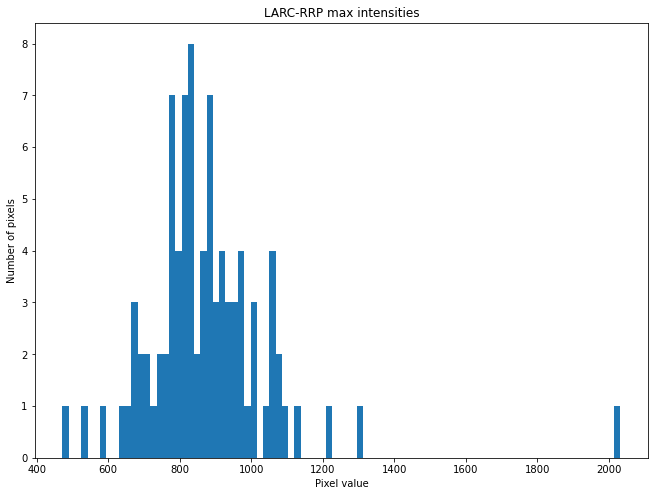

In [108]:
histogram_pixels(max_img)

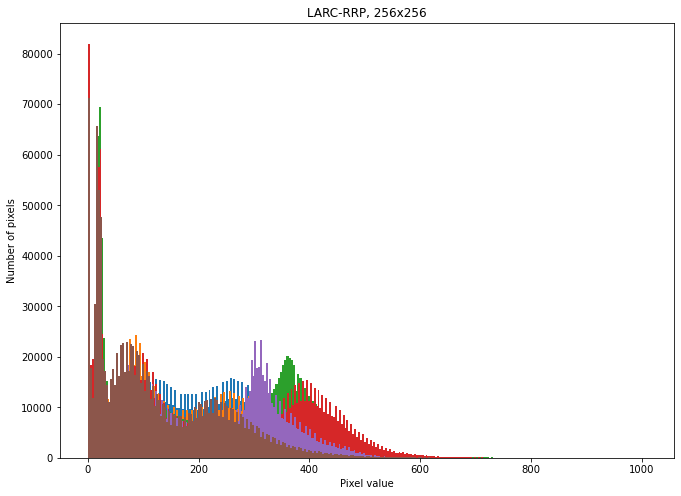

In [74]:
histogram_pixels(pixel_intensities_256)

In [19]:
path = '/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-035/image.nii'
image = sitk.ReadImage(path)
image_array = sitk.GetArrayFromImage(image)
for i in range(image_array.shape[0]):
    print('Slice:', i+1, 'Intensity:', image_array[i].max())
print(image_array.shape)

Slice: 1 Intensity: 561
Slice: 2 Intensity: 628
Slice: 3 Intensity: 619
Slice: 4 Intensity: 730
Slice: 5 Intensity: 736
Slice: 6 Intensity: 754
Slice: 7 Intensity: 755
Slice: 8 Intensity: 682
Slice: 9 Intensity: 660
Slice: 10 Intensity: 626
Slice: 11 Intensity: 714
Slice: 12 Intensity: 758
Slice: 13 Intensity: 689
Slice: 14 Intensity: 673
Slice: 15 Intensity: 692
Slice: 16 Intensity: 799
Slice: 17 Intensity: 672
Slice: 18 Intensity: 783
Slice: 19 Intensity: 1438
Slice: 20 Intensity: 2033
Slice: 21 Intensity: 1539
Slice: 22 Intensity: 1006
Slice: 23 Intensity: 623
Slice: 24 Intensity: 589
Slice: 25 Intensity: 628
Slice: 26 Intensity: 655
Slice: 27 Intensity: 602
Slice: 28 Intensity: 586
Slice: 29 Intensity: 599
Slice: 30 Intensity: 645
Slice: 31 Intensity: 596
Slice: 32 Intensity: 548
Slice: 33 Intensity: 577
Slice: 34 Intensity: 640
Slice: 35 Intensity: 537
Slice: 36 Intensity: 475
Slice: 37 Intensity: 477
Slice: 38 Intensity: 451
(38, 352, 352)


In [77]:
patient_paths_train_352 = ['/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-001/image.nii',
                       '/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-004/image.nii',
                       '/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-006/image.nii',
                      '/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-007/image.nii',
                      '/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-017/image.nii',
                      '/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-018/image.nii',
                      '/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-020/image.nii',
                      '/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-021/image.nii',
                      '/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-022/image.nii',
                      '/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-026/image.nii',
                      '/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-027/image.nii',
                       '/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-028/image.nii',
                      '/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-030/image.nii',
                      '/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-031/image.nii',
                      '/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-032/image.nii',
                      '/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-034/image.nii',
                      '/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-035/image.nii']

patient_paths_train_256 = ['/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-016/image.nii',
                          '/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-019/image.nii']

sum = 0
for i in range(len(patient_paths_train_256)):
    print(patient_paths_train_256[i])
    image = sitk.ReadImage(patient_paths_train_256[i])
    image_array = sitk.GetArrayFromImage(image)
    print(image_array.shape)
    sum += image_array.shape[0]

print(sum)
print(sum-(38-21))


/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-016/image.nii
(20, 256, 256)
/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped/LARC-RRP-019/image.nii
(20, 256, 256)
40
23


In [35]:
find_voxel_intensities(Oxy_df)

[2118.1294261294224, 2697.5326007325966, 2640.924542124542, 2671.903296703296, 3756.3108669108624, 2761.991208791205, 3357.1626373626345, 2669.6126984126945, 2673.1516483516484, 3170.56068376068, 3199.8547008546966, 2779.0007326007308, 3715.3597069597067, 2841.929181929182, 2611.4554334554305, 2538.39658119658, 2523.808547008545, 2958.013186813169, 2931.309890109875, 3134.1719169719063, 2485.2844932844723, 3294.205616605585, 2516.624175824165, 2667.5418803418784, 2530.558730158728, 3278.668376068369, 2358.595848595848, 2984.4984126984045, 2851.0300366300353, 2626.69597069596, 2650.345543345541, 2652.506959706959, 2138.089377289377, 2896.8131868131827, 2869.468131868131, 3134.1487179487153, 2654.8498168498127, 2883.304273504269, 2583.460073260069, 2292.5706959706913, 2519.2400488400485, 2622.3777777777764, 2538.4639804639796, 2838.2864468864423, 2278.0048840048817, 2648.08913308913, 3111.1868131868055, 2859.428571428567, 2374.512820512817, 2644.8087912087904, 2547.7958485958457, 2545.47

(3805.948717948714, 0.0, 1000, 0)

In [36]:
find_voxel_intensities(LARC_df)

[906, 1038, 880, 978, 1056, 1083, 1102, 836, 885, 870, 1008, 892, 865, 722, 965, 926, 1234, 1073, 908, 875, 880, 912, 1146, 1078, 853, 970, 926, 806, 717, 998, 2722, 931, 913, 933, 917, 859, 945, 996, 664, 1134, 1141, 1097, 1077, 995, 1314, 886, 1078, 925, 992, 1037, 957, 1011, 1024, 1004, 1189, 888, 1005, 1052, 829, 818, 960, 936, 1048, 1007, 977, 1074, 956, 1199, 780, 1533, 1214, 1158, 921, 758, 975, 1057, 927, 926, 939, 1015, 1054, 976, 905, 895, 861, 921, 869, 949, 1085]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

(2722, 0, 1, 0)

### Get dimensions of image files.

In [97]:
LARC_df = p.dimensions(LARC_df)

In [98]:
LARC_df

,patientPaths,ID,imagePaths,maskPaths,xDimension,yDimension,zDimension,xVoxelDimension,yVoxelDimension,zVoxelDimension
0,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-003,LARC-RRP-003,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-003/MRS1/image.nii,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-003/MRS1/1 RTSTRUCT LARC_MRS1-label.nii,512,512,20,0.390625,0.390625,5
1,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-004,LARC-RRP-004,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-004/MRS1/image.nii,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-004/MRS1/1 RTSTRUCT LARC_MRS1-label.nii,512,512,35,0.390625,0.390625,5
2,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-005,LARC-RRP-005,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-005/MRS1/image.nii,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-005/MRS1/1 RTSTRUCT LARC_MRS1-label.nii,512,512,38,0.390625,0.390625,5
3,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-006,LARC-RRP-006,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-006/MRS1/image.nii,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-006/MRS1/1 RTSTRUCT LARC_MRS1-label.nii,512,512,38,0.390625,0.390625,5
4,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-007,LARC-RRP-007,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-007/MRS1/image.nii,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-007/MRS1/1 RTSTRUCT LARC_MRS1-label.nii,512,512,35,0.390625,0.390625,5
5,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-008,LARC-RRP-008,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-008/MRS1/image.nii,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-008/MRS1/1 RTSTRUCT LARC_MRS1-label.nii,512,512,35,0.390625,0.390625,5
6,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-009,LARC-RRP-009,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-009/MRS1/image.nii,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-009/MRS1/1 RTSTRUCT LARC_MRS1-label.nii,512,512,38,0.390625,0.390625,5
7,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-001,LARC-RRP-001,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-001/MRS1/image.nii,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-001/MRS1/1 RTSTRUCT LARC_MRS1-label.nii,512,512,18,0.390625,0.390625,5
8,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-011,LARC-RRP-011,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-011/MRS1/image.nii,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-011/MRS1/1 RTSTRUCT LARC_MRS1-label.nii,256,256,21,0.9375,0.9375,6
9,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-013,LARC-RRP-013,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-013/MRS1/image.nii,/Volumes/Untitled 1/LARC_T2_cleaned_nii/LARC-RRP-013/MRS1/1 RTSTRUCT LARC_MRS1-label.nii,256,256,22,0.9375,0.9375,5


In [99]:
Oxy_df = p.dimensions(Oxy_df)

In [100]:
Oxy_df

,patientPaths,ID,imagePaths,maskPaths,xDimension,yDimension,zDimension,xVoxelDimension,yVoxelDimension,zVoxelDimension
0,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_103_PRE,Oxytarget_103_PRE,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_103_PRE/T2.nii,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_103_PRE/Manual_an.nii,512,512,26,0.351562,0.351562,2.75
1,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_106_PRE,Oxytarget_106_PRE,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_106_PRE/T2.nii,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_106_PRE/Manual_an.nii,512,512,26,0.351562,0.351562,2.75
2,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_108_PRE,Oxytarget_108_PRE,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_108_PRE/T2.nii,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_108_PRE/Manual_an.nii,512,512,18,0.351562,0.351562,2.75
3,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_110_PRE,Oxytarget_110_PRE,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_110_PRE/T2.nii,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_110_PRE/Manual_an.nii,512,512,26,0.351562,0.351562,2.75
4,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_111_PRE,Oxytarget_111_PRE,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_111_PRE/T2.nii,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_111_PRE/Manual_an.nii,512,512,26,0.351562,0.351562,2.75
5,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_113_PRE,Oxytarget_113_PRE,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_113_PRE/T2.nii,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_113_PRE/Manual_an.nii,512,512,26,0.351562,0.351562,3.3
6,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_115_PRE,Oxytarget_115_PRE,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_115_PRE/T2.nii,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_115_PRE/Manual_an.nii,512,512,24,0.351562,0.351562,2.75
7,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_116_PRE,Oxytarget_116_PRE,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_116_PRE/T2.nii,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_116_PRE/Manual_an.nii,512,512,28,0.351562,0.351562,2.75
8,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_118_PRE,Oxytarget_118_PRE,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_118_PRE/T2.nii,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_118_PRE/Manual_an.nii,512,512,20,0.351562,0.351562,2.75
9,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_120_PRE,Oxytarget_120_PRE,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_120_PRE/T2.nii,/Volumes/Untitled/Ingvild_Oxytarget/Oxytarget_120_PRE/Manual_an.nii,512,512,26,0.351562,0.351562,2.75


### Illustrate dimensions in histogram

Start by creating categories for each dimension

In [101]:
def categorize(data):

    category = np.zeros(len(data))

    for index, row in data.iterrows():
        if row['xDimension'] == 256:
            category[index] = 1
        elif row['xDimension'] == 352:
            category[index] = 2
        elif row['xDimension'] == 384:
            category[index] = 3
        elif row['xDimension'] == 512:
            category[index] = 4
        elif row['xDimension'] == 528:
            category[index] = 5
        elif row['xDimension'] == 560:
            category[index] = 6
        elif row['xDimension'] == 640:
            category[index] = 7    



        else:
            print('Patient ' + str(index) + ' unknown category')

    return category


In [108]:
def plot_distribution(category):

    stage = FixedFormatter(['256','352', '384', '512', '528', '560', '640'])
    counts = [(category == 1).sum(), (category == 2).sum(), (category == 3).sum(), (category == 4).sum(), (category == 5).sum(), (category == 6).sum(), (category == 7).sum()]
    
    x = np.arange(7)
    width = 0.35
    xloc = FixedLocator(x)

    matplotlib.rcParams.update({'font.size': 25})
    matplotlib.rcParams['font.family'] = "serif"
    matplotlib.rcParams.update({'xtick.labelsize': 25})

    fig = plt.figure(figsize=(11,8))
    ax = fig.gca()

    rects = ax.bar(x, counts, width, color='#00509E', label=None)

    ax.set_ylabel(r'Number of patients')
    ax.set_xlabel(r'Image dimension') #, fontsize=20)
    ax.xaxis.set_major_formatter(stage)
    ax.xaxis.set_major_locator(xloc)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom, 200+10)
    #ax.legend()
    fig.tight_layout()
    plt.show()
    
    fig.savefig('dimensions.pdf')

In [109]:
cat_Oxy = categorize(Oxy_df)
cat_LARC = categorize(LARC_df)
print(cat_LARC)
categories = np.append(cat_LARC, cat_Oxy)
print(categories)

[4. 4. 4. 4. 4. 4. 4. 4. 1. 1. 1. 1. 1. 4. 4. 1. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 7. 7. 7. 7. 7. 7. 7. 7. 7. 3. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]
[4. 4. 4. 4. 4. 4. 4. 4. 1. 1. 1. 1. 1. 4. 4. 1. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 7. 7. 7. 7. 7. 7. 7. 7. 7. 3. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 6. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4.]


<ipython-input-108-8cb2c6b83704>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(stage)


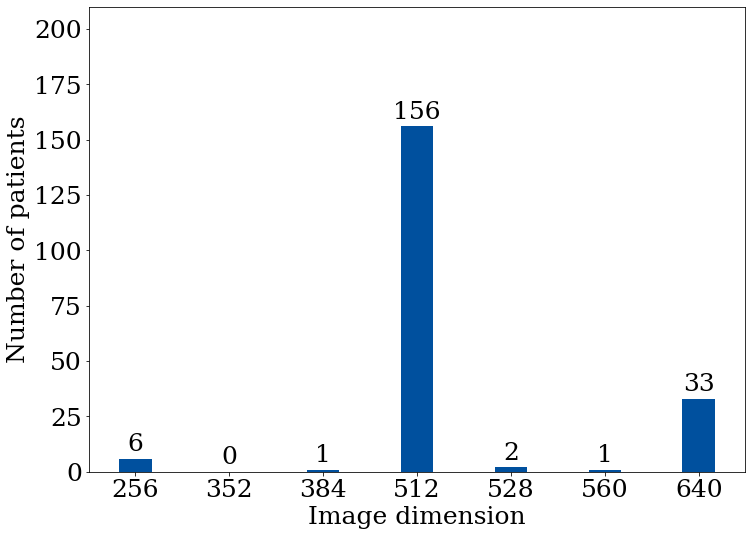

In [110]:
plot_distribution(categories)

### Crop images

Create destination folders.

In [6]:
dst_main_folder = '/Volumes/Untitled 1/Oxy_cropped_new'

dst_subfolder_list = [f for f in os.listdir(dst_main_folder) 
                      if os.path.isdir(os.path.join(dst_main_folder, f))]

dst_list = []

for i in range(len(dst_subfolder_list)):
    dst_list.append(dst_main_folder + '/' + dst_subfolder_list[i])

In [28]:
def crop_images(dataframe, new_dimension, destination_folders_list, image_filename, mask_filename):
    """
    Crops the images to the value given by new_dimension.
    NB! Assumes binary masks (0 and 1)
    """
    for i in range(len(dataframe['imagePaths'])):

        image_original = sitk.ReadImage(dataframe['imagePaths'][i])
        mask_original = sitk.ReadImage(dataframe['maskPaths'][i])
        image_imsize_original = image_original.GetSize()

        if image_imsize_original[1] != 256:
            crop_start = int((image_imsize_original[1]-new_dimension)/2)
            print(crop_start)
            crop_stop = int(image_imsize_original[1]-crop_start)
            print(crop_stop)

            image_cropped = image_original[crop_start:crop_stop,(crop_start+10):(crop_stop+10),:]
            mask_cropped = mask_original[crop_start:crop_stop,(crop_start+10):(crop_stop+10),:]
            
            print('Original imagesize:', dataframe['imagePaths'][i], image_original.GetSize())
            print('Original masksize:', dataframe['maskPaths'][i], mask_original.GetSize())
            
            print('Cropped imagesize:', image_cropped.GetSize())
            print('Cropped masksize:', mask_cropped.GetSize())
            
            mask_array_original = sitk.GetArrayFromImage(mask_original)
            mask_array_cropped = sitk.GetArrayFromImage(mask_cropped)
            
            tumor_originally = np.count_nonzero(mask_array_original.flatten()==1)
            tumor_cropped = np.count_nonzero(mask_array_cropped.flatten() == 1)
            
            move_window = 0
            while tumor_originally != tumor_cropped:
                
                print('THE AMOUNT OF TUMOR IS REDUCED AFTER CROPPING! PATH:', dataframe['imagePaths'][i])
                
                move_window += 5

                image_cropped = image_original[(crop_start+move_window):(crop_stop+move_window),(crop_start+10+move_window):(crop_stop+10+move_window),:]
                mask_cropped = mask_original[(crop_start+move_window):(crop_stop+move_window),(crop_start+10+move_window):(crop_stop+10+move_window),:]
                
                mask_array_cropped = sitk.GetArrayFromImage(mask_cropped)
                
                tumor_cropped = np.count_nonzero(mask_array_cropped.flatten() == 1)
                
                print('Tumor before cropping:', tumor_originally)
                print('Tumor after moving cropping window:', tumor_cropped)
            
            move_window = 0
        
        else:
            image_cropped = image_original
            mask_cropped = mask_original
        
        sitk.WriteImage(image_cropped, os.path.join(destination_folders_list[i], image_filename))
        sitk.WriteImage(mask_cropped, os.path.join(destination_folders_list[i], mask_filename))
                
                

In [146]:
crop_images(LARC_df, 352, dst_list, 'image.nii', '1 RTSTRUCT LARC_MRS1-label.nii')

80
432
Original imagesize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-003/MRS1/image.nii (512, 512, 20)
Original masksize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-003/MRS1/1 RTSTRUCT LARC_MRS1-label.nii (512, 512, 20)
Cropped imagesize: (352, 352, 20)
Cropped masksize: (352, 352, 20)
80
432
Original imagesize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-004/MRS1/image.nii (512, 512, 35)
Original masksize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-004/MRS1/1 RTSTRUCT LARC_MRS1-label.nii (512, 512, 35)
Cropped imagesize: (352, 352, 35)
Cropped masksize: (352, 352, 35)
80
432
Original imagesize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-005/MRS1/image.nii (512, 512, 38)
Original masksize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-005/MRS1/1 RTSTRUCT LARC_MRS1-label.nii (512, 512, 38)
Cropped imagesize: (352, 352, 38)
Cropped masksize: (352, 352, 38)
80
432
Original imagesize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-006/MRS1/image.nii (512, 512, 38)
Orig

80
432
Original imagesize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-038/MRS1/image.nii (512, 512, 38)
Original masksize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-038/MRS1/1 RTSTRUCT LARC_MRS1-label.nii (512, 512, 38)
Cropped imagesize: (352, 352, 38)
Cropped masksize: (352, 352, 38)
80
432
Original imagesize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-039/MRS1/image.nii (512, 512, 38)
Original masksize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-039/MRS1/1 RTSTRUCT LARC_MRS1-label.nii (512, 512, 38)
Cropped imagesize: (352, 352, 38)
Cropped masksize: (352, 352, 38)
80
432
Original imagesize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-040/MRS1/image.nii (512, 512, 38)
Original masksize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-040/MRS1/1 RTSTRUCT LARC_MRS1-label.nii (512, 512, 38)
Cropped imagesize: (352, 352, 38)
Cropped masksize: (352, 352, 38)
80
432
Original imagesize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-041/MRS1/image.nii (512, 512, 36)
Orig

144
496
Original imagesize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-062/MRS1/image.nii (640, 640, 36)
Original masksize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-062/MRS1/1 RTSTRUCT LARC_MRS1-label.nii (640, 640, 36)
Cropped imagesize: (352, 352, 36)
Cropped masksize: (352, 352, 36)
144
496
Original imagesize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-064/MRS1/image.nii (640, 640, 36)
Original masksize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-064/MRS1/1 RTSTRUCT LARC_MRS1-label.nii (640, 640, 36)
Cropped imagesize: (352, 352, 36)
Cropped masksize: (352, 352, 36)
144
496
Original imagesize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-065/MRS1/image.nii (640, 640, 36)
Original masksize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-065/MRS1/1 RTSTRUCT LARC_MRS1-label.nii (640, 640, 36)
Cropped imagesize: (352, 352, 36)
Cropped masksize: (352, 352, 36)
144
496
Original imagesize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-066/MRS1/image.nii (640, 640, 36)


144
496
Original imagesize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-084/MRS1/image.nii (640, 640, 36)
Original masksize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-084/MRS1/1 RTSTRUCT LARC_MRS1-label.nii (640, 640, 36)
Cropped imagesize: (352, 352, 36)
Cropped masksize: (352, 352, 36)
144
496
Original imagesize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-085/MRS1/image.nii (640, 640, 36)
Original masksize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-085/MRS1/1 RTSTRUCT LARC_MRS1-label.nii (640, 640, 36)
Cropped imagesize: (352, 352, 36)
Cropped masksize: (352, 352, 36)
144
496
Original imagesize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-086/MRS1/image.nii (640, 640, 36)
Original masksize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-086/MRS1/1 RTSTRUCT LARC_MRS1-label.nii (640, 640, 36)
Cropped imagesize: (352, 352, 36)
Cropped masksize: (352, 352, 36)
144
496
Original imagesize: /Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-087/MRS1/image.nii (640, 640, 36)


In [30]:
crop_images(Oxy_df, 352, dst_list, 'T2.nii', 'Manual_an.nii')

80
432
Original imagesize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_103_PRE/T2.nii (512, 512, 26)
Original masksize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_103_PRE/Manual_an.nii (512, 512, 26)
Cropped imagesize: (352, 352, 26)
Cropped masksize: (352, 352, 26)
80
432
Original imagesize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_106_PRE/T2.nii (512, 512, 26)
Original masksize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_106_PRE/Manual_an.nii (512, 512, 26)
Cropped imagesize: (352, 352, 26)
Cropped masksize: (352, 352, 26)
80
432
Original imagesize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_108_PRE/T2.nii (512, 512, 18)
Original masksize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_108_PRE/Manual_an.nii (512, 512, 18)
Cropped imagesize: (352, 352, 18)
Cropped masksize: (352, 352, 18)
80
432
Original imagesize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_110_PRE/T2.nii (512, 512, 26)
Original masksize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_

80
432
Original imagesize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_153_PRE/T2.nii (512, 512, 26)
Original masksize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_153_PRE/Manual_an.nii (512, 512, 26)
Cropped imagesize: (352, 352, 26)
Cropped masksize: (352, 352, 26)
80
432
Original imagesize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_154_PRE/T2.nii (512, 512, 26)
Original masksize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_154_PRE/Manual_an.nii (512, 512, 26)
Cropped imagesize: (352, 352, 26)
Cropped masksize: (352, 352, 26)
80
432
Original imagesize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_155_PRE/T2.nii (512, 512, 26)
Original masksize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_155_PRE/Manual_an.nii (512, 512, 26)
Cropped imagesize: (352, 352, 26)
Cropped masksize: (352, 352, 26)
80
432
Original imagesize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_156_PRE/T2.nii (512, 512, 24)
Original masksize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_

80
432
Original imagesize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_192_PRE/T2.nii (512, 512, 20)
Original masksize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_192_PRE/Manual_an.nii (512, 512, 20)
Cropped imagesize: (352, 352, 20)
Cropped masksize: (352, 352, 20)
80
432
Original imagesize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_24_PRE/T2.nii (512, 512, 26)
Original masksize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_24_PRE/Manual_an.nii (512, 512, 26)
Cropped imagesize: (352, 352, 26)
Cropped masksize: (352, 352, 26)
80
432
Original imagesize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_27_PRE/T2.nii (512, 512, 26)
Original masksize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_27_PRE/Manual_an.nii (512, 512, 26)
Cropped imagesize: (352, 352, 26)
Cropped masksize: (352, 352, 26)
80
432
Original imagesize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_28_PRE/T2.nii (512, 512, 14)
Original masksize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_28_PR

80
432
Original imagesize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_72_PRE/T2.nii (512, 512, 26)
Original masksize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_72_PRE/Manual_an.nii (512, 512, 26)
Cropped imagesize: (352, 352, 26)
Cropped masksize: (352, 352, 26)
80
432
Original imagesize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_73_PRE/T2.nii (512, 512, 30)
Original masksize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_73_PRE/Manual_an.nii (512, 512, 30)
Cropped imagesize: (352, 352, 30)
Cropped masksize: (352, 352, 30)
80
432
Original imagesize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_74_PRE/T2.nii (512, 512, 27)
Original masksize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_74_PRE/Manual_an.nii (512, 512, 27)
Cropped imagesize: (352, 352, 27)
Cropped masksize: (352, 352, 27)
104
456
Original imagesize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_75_PRE/T2.nii (560, 560, 20)
Original masksize: /Volumes/Untitled 1/Ingvild_Oxytarget/Oxytarget_75_PRE